In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,6) #adjusts config of created plots

# Set style for better looking plots
plt.style.use('default')
sns.set_palette("husl")

df = pd.read_csv('reef_combined.csv')

In [66]:
# Take a look at the data
df.head()

,date,reef_break,interest,dhw
0,2019-01-01,Pipeline,18,0.0
1,2019-02-01,Pipeline,16,0.0
2,2019-03-01,Pipeline,12,0.0
3,2019-04-01,Pipeline,10,0.0
4,2019-05-01,Pipeline,8,0.0


In [67]:
# Check for missing data using for loop
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
reef_break - 0%
interest - 0%
dhw - 10%


In [68]:
# Drop rows where dhw is NaN
df = df.dropna(subset=["dhw"]).reset_index(drop=True)

# Check again
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

date - 0%
reef_break - 0%
interest - 0%
dhw - 0%


In [69]:
# Check Data Types for columns
print(df.dtypes)

date           object
reef_break     object
interest        int64
dhw           float64
dtype: object


In [70]:
# Show the dataframe
df

,date,reef_break,interest,dhw
0,2019-01-01,Pipeline,18,0.000000
1,2019-02-01,Pipeline,16,0.000000
2,2019-03-01,Pipeline,12,0.000000
3,2019-04-01,Pipeline,10,0.000000
4,2019-05-01,Pipeline,8,0.000000
...,...,...,...,...
775,2024-08-01,Chinamans,0,0.000000
776,2024-09-01,Chinamans,0,0.000000
777,2024-10-01,Chinamans,0,0.000000
778,2024-11-01,Chinamans,0,0.000000


In [71]:
# Check for duplicates based on date and reef_break
duplicates = df[df.duplicated(subset=["date", "reef_break"], keep=False)]

print(f"Total duplicates: {len(duplicates)}")
display(duplicates.head())


Total duplicates: 0


,date,reef_break,interest,dhw


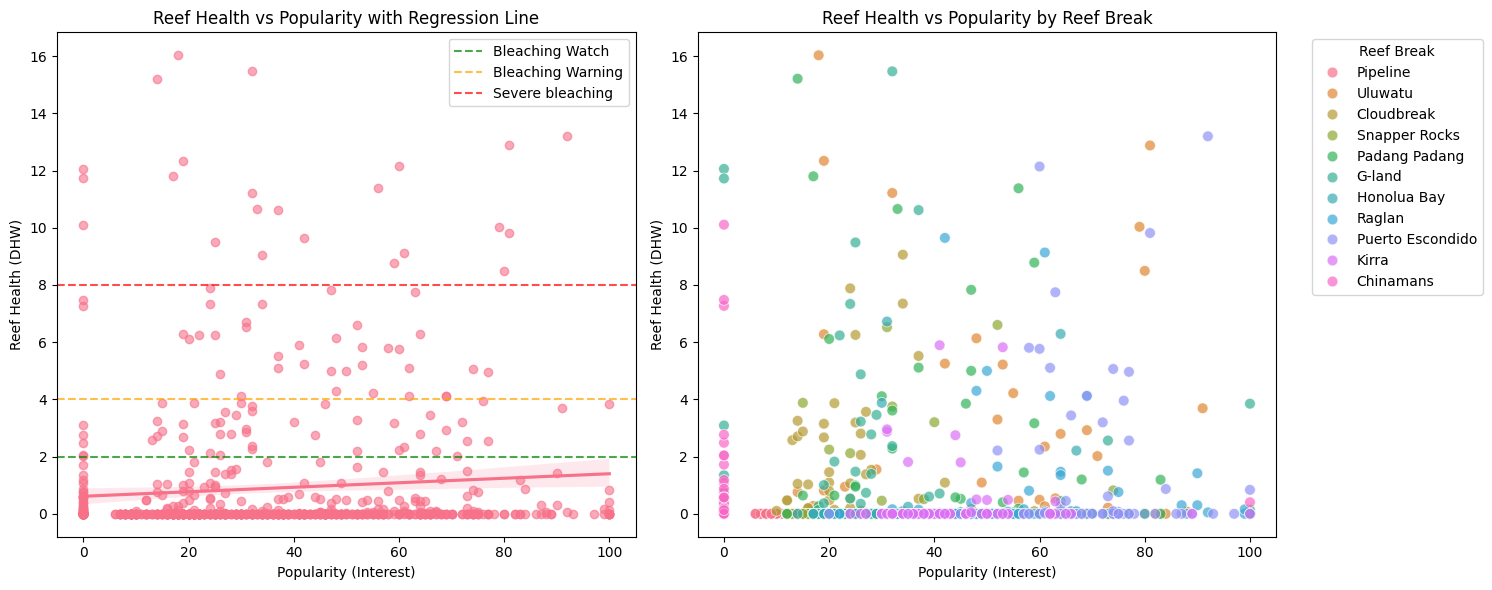

Correlation coefficient between DHW and Interest: 0.083


In [ ]:

# Scatterplot: Reef health (DHW) vs. Interest/Popularity
# This plots all the data, where each point is the monthly average of dhw and interst

# DHW (Degree Heating Weeks) measures accumulated heat stress on coral reefs.
# - 0–2 °C-weeks: No significant stress
# - 2–4 °C-weeks: Bleaching Watch (corals may start to be stressed)
# - 4–8 °C-weeks: Bleaching Warning (likely bleaching)
# - ≥8 °C-weeks: Severe bleaching & mortality risk
#
# Google Trends "interest" is a popularity score (0–100) that shows
# how often people search for a term compared to its peak search volume.

# Create a figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scatterplot with regression line
sns.regplot(data=df, y="dhw", x="interest", ax=ax1, scatter_kws={'alpha':0.6})
ax1.set_title("Reef Health vs Popularity with Regression Line")
ax1.set_ylabel("Reef Health (DHW)")
ax1.set_xlabel("Popularity (Interest)")

# Add DHW threshold lines
ax1.axhline(2, color="green", linestyle="--", alpha=0.7, label="Bleaching Watch")
ax1.axhline(4, color="orange", linestyle="--", alpha=0.7, label="Bleaching Warning")
ax1.axhline(8, color="red", linestyle="--", alpha=0.7, label="Severe bleaching")
ax1.legend()

# Enhanced scatterplot with colour coded reef breaks
scatter = sns.scatterplot(data=df, y="dhw", x="interest", hue="reef_break", alpha=0.7, ax=ax2, s=60)
ax2.set_title("Reef Health vs Popularity by Reef Break")
ax2.set_ylabel("Reef Health (DHW)")
ax2.set_xlabel("Popularity (Interest)")

# Move legend outside
ax2.legend(title="Reef Break", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Print correlation coefficient for quantitative analysis
correlation = df['dhw'].corr(df['interest'])
print(f"Correlation coefficient between DHW and Interest: {correlation:.3f}")

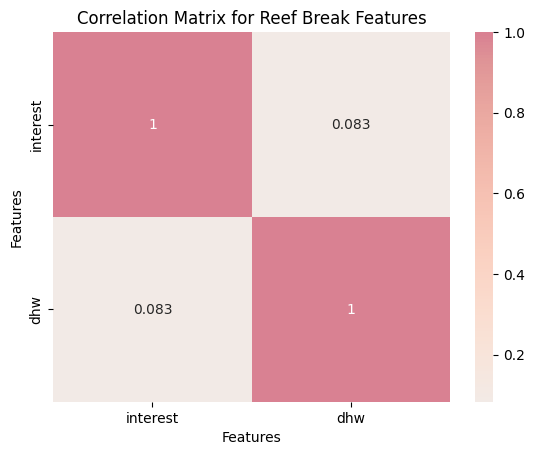

In [115]:
correlation_matrix = df.select_dtypes(include=["number"]).corr()   #df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", alpha=0.5, center=0)

plt.title("Correlation Matrix for Reef Break Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
# The coefficient suggests there isn't a correlation between reef health and popularity.

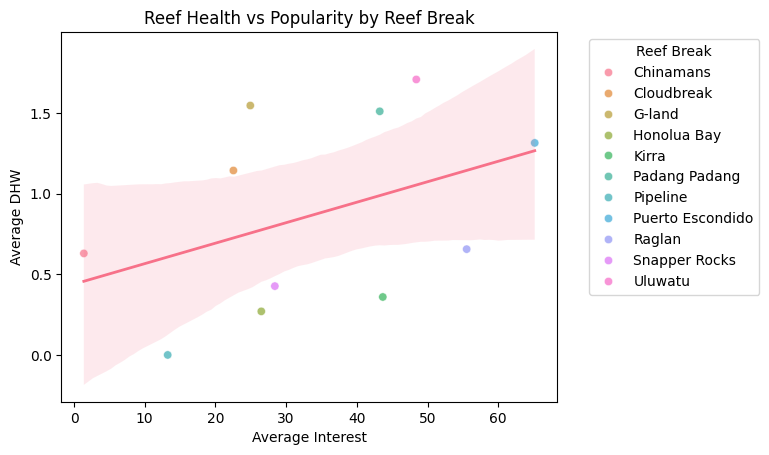

Correlation coefficient between DHW and Interest: 0.407


In [98]:
# This scatterplot groups by mean DHW and Interest.
# It differs from the previous since it had many points for one reef break.

agg_df = df.groupby("reef_break")[["dhw", "interest"]].mean().reset_index()
sns.scatterplot(data=agg_df, y="dhw", x="interest", hue="reef_break", alpha=0.7)

# Regression line
sns.regplot(data=agg_df, y="dhw", x="interest", scatter=False, line_kws={"linewidth":2})

plt.title("Reef Health vs Popularity by Reef Break")
plt.ylabel("Average DHW")
plt.xlabel("Average Interest")
plt.legend(title="Reef Break", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Print correlation coefficient for quantitative analysis
correlation = agg_df['dhw'].corr(agg_df['interest'])
print(f"Correlation coefficient between DHW and Interest: {correlation:.3f}")

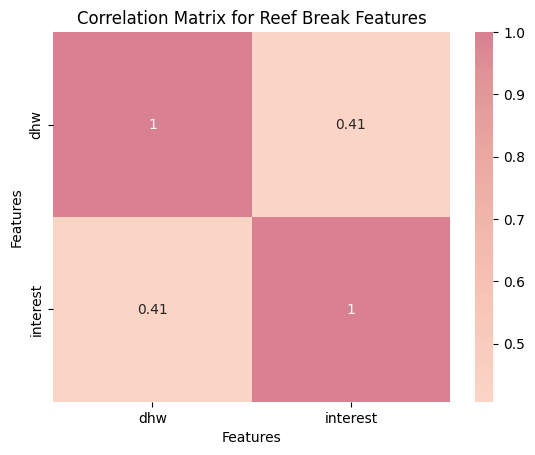

In [114]:
correlation_matrix = agg_df.select_dtypes(include=["number"]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", alpha=0.5, center=0)

plt.title("Correlation Matrix for Reef Break Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

In [ ]:
# This suggests that when the mean is considered, overall there is a slight positive correlation, meaning when interest is consistently higher, so is the DHW.
# But as shown in the graph, the dhw values do not present a serious dangers. Since the mean is always bellow 2 it shows no significant stress.